In [53]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 
import os

In [23]:
X, y = dataset["data"], dataset["target"] 

In [24]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [25]:
m = 60000  
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

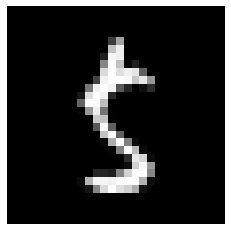

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [46]:
i = 444
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [40]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [41]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [42]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [43]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

<ipython-input-41-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 0 cost:  9.805465847454661


KeyboardInterrupt: 

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 833    0   38   14    9   48   46   12   11   22]
 [   1 1038   19   16   10   20    4   19   14    9]
 [  12    9  704   65   24   26   50   25   70   16]
 [  19   18   53  664   20  101   21   18   77   31]
 [   4    2   46    3  696   23   49   39   29  119]
 [  48   21   24   79   19  458   23   23   78   32]
 [  40    7   39   25   42   54  737   10   21   12]
 [   8   11   25   44   22   51    1  757   37  106]
 [  10   29   70   80   24   83   19   37  605   37]
 [   5    0   14   20  116   28    8   88   32  625]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.91      0.90      0.91      1150
           2       0.68      0.70      0.69      1001
           3       0.66      0.65      0.65      1022
           4       0.71      0.69      0.70      1010
           5       0.51      0.57      0.54       805
           6       0.77      0.75      0.76       987
           7       0.74      0.71   

<ipython-input-41-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


In [58]:
def get_all_files_in_folder(path_=""):
    my_files=[file for file in os.listdir(path_) if os.path.isfile(path_ + '\\'+str(file))]
    return my_files
def get_my_files(data_folder_1):
    files=get_all_files_in_folder(data_folder_1)
    return files

In [59]:
data_folder_1=r"C:\Users\Hakan\Desktop\Github\Goruntu-Isleme\MCNN_MNIST\data_signature"

In [62]:
files1 = get_my_files(data_folder_1)
print(files1)

[]
